# Modèle de Classification detection d'anomalies

https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/

## 1. Librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Dataset

In [3]:
# nom de fichier et chemin relatif
filename = 'encoded_merge_clean_metrics_dataset.csv'
path = '../data/metrics/'
# création d'un dataframe à partir du csv de données
df = pd.read_csv(path+filename, index_col=0)
df.head(2)

,value,timestamp,criticality,identification,varnishLevelsTargetvolume,varnishLevelsTotalvolume,type_Varnish Printer,type_iFoil,name_counter_3D Varnish Counter,name_counter_Foiled Pages Counter,...,source_ICB n°6,source_ICB n°7,source_ICB n°8,source_Kernel,source_PLC,source_Pilot,source_RCB n°1,source_RCB n°2,source_RCB n°3,source_iFoil
0,1792992,2022-04-15 05:55:06.678000+00:00,0,0,36192,100000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,22881,2022-04-15 05:55:06.678000+00:00,0,0,36192,100000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3546276 entries, 0 to 3546275
Data columns (total 31 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   value                              int64 
 1   timestamp                          object
 2   criticality                        int64 
 3   identification                     int64 
 4   varnishLevelsTargetvolume          int64 
 5   varnishLevelsTotalvolume           int64 
 6   type_Varnish Printer               int64 
 7   type_iFoil                         int64 
 8   name_counter_3D Varnish Counter    int64 
 9   name_counter_Foiled Pages Counter  int64 
 10  name_counter_Total Pages Counter   int64 
 11  name_op_Distributor                int64 
 12  name_op_JAN                        int64 
 13  name_op_Micka                      int64 
 14  name_op_Viktor                     int64 
 15  level_Distributor                  int64 
 16  level_Operator                     i

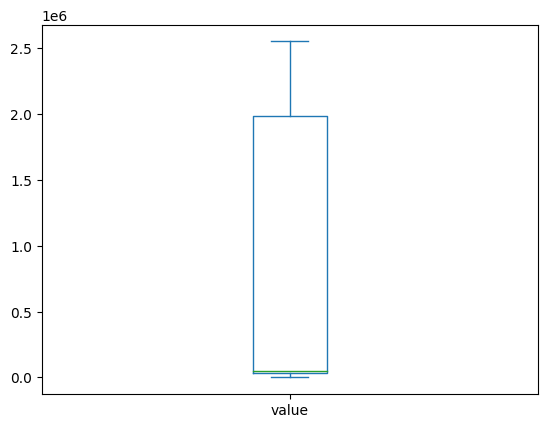

In [13]:
# Generate a Boxplot
df['value'].plot(kind='box')
plt.show()

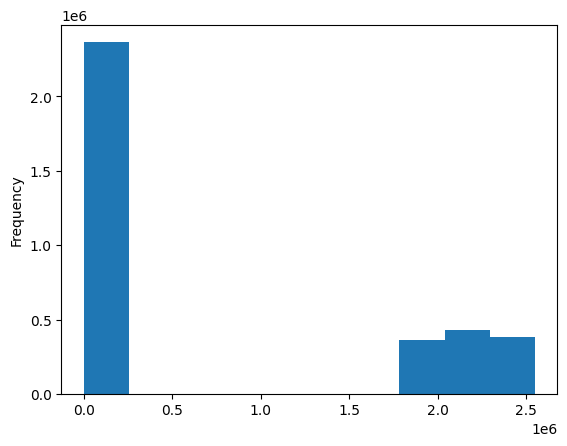

In [15]:
# Generate a Histogram plot
df['value'].plot(kind='hist')
plt.show()

ValueError: x and y must be the same size

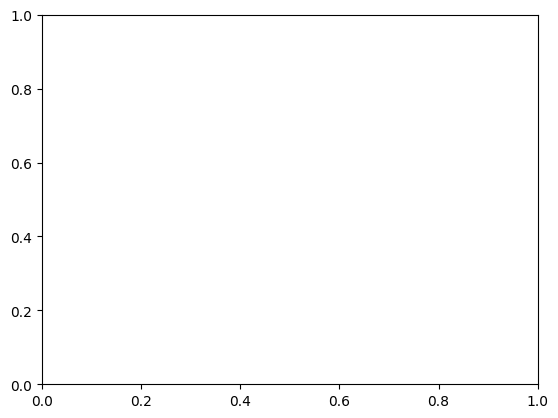

In [16]:
# Convert the salary values to a numpy array
salary_raw = df['value'].values
# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans
from scipy import cluster
# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(salary_raw, 4)
# Get the groups (clusters) and distances
groups, cdist = cluster.vq.vq(salary_raw, centroids)
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('value')
plt.ylabel('criticality')
plt.show()